# Homework 1

Modify the coin change code such that the program returns the number of coins for each coin type
for both approaches.

In [1]:
#Approch 1

def coin_change_greedy(amount, denominations):
    denominations = sorted(denominations, reverse=True)   # sort denominations in descending order

    counts = {coin: 0 for coin in denominations}     # initialize counts for each coin

    for coin in denominations:
        num = amount // coin      # integer division
        counts[coin] = num
        amount = amount % coin    # remainder becomes new amount

    return counts

print(coin_change_greedy(39, [1, 2, 5, 10]))


{10: 3, 5: 1, 2: 2, 1: 0}


In [ ]:
#Approch 2  Using Recursion
def getMinWithBreakdown(amount, denom, i):
    # base case
    if amount == 0 or i < 0:   # no amount left or no coins left
        return 0, {}

    coin = denom[i]
    take = amount // coin
    leftover = amount % coin

    rest_total, rest_counts = getMinWithBreakdown(leftover, denom, i - 1)   # solve for remainder with smaller coins

    # record usage for this coin
    rest_counts = dict(rest_counts)  # make a copy
    rest_counts[coin] = take    # add current coin usage

    return take + rest_total, rest_counts

def coin_change_recursive(amount, denominations):
    denominations = sorted(denominations)  # sort denominations in ascending order
    total, counts = getMinWithBreakdown(amount, denominations, len(denominations) - 1)    # start with largest coin

    # ensure all coins exist in dict
    for c in denominations[::-1]:  # reverse to match original order
        counts.setdefault(c, 0)   

    return total, counts

total, breakdown = coin_change_recursive(39, [1,2,5,10])
print("total coins =", total)
print("breakdown  =", breakdown)


total coins = 6
breakdown  = {2: 2, 5: 1, 10: 3, 1: 0}


# Homework 2

• Find the Time Complexity and Space Complexity of the greedy algorithm that solve the Maximum <br>
Number of Stocks to Buy problem described earlier. Explain your work and explain how do you come  <br>
up with the time complexity and space complexity.  <br>
• Hint: the algorithm’s performance (the time complexity and space complexity) are as follows. <br>
• Time Complexity = O(n log n) <br>
• Space Complexity = O(n) <br>

In [ ]:
def buyMaximumProducts(n, R, price):
    arr = []                            
    for i in range(n):                   # create pairs of [day, price]
        arr.append([i + 1, price[i]])   

    arr.sort(key=lambda x: x[1])        # Sort by price

    total_purchase = 0
    for i in range(n):                  # iterate through sorted prices
        can_buy_today = min(arr[i][0], R // arr[i][1])    # max purchasable today
        total_purchase += can_buy_today                   # update total purchases
        R -= can_buy_today * arr[i][1]                    # update remaining budget

    return total_purchase

price = [10, 7, 19]
R = 45
print(buyMaximumProducts(len(price), R, price))


4


Time Complexity Explanation <br>

1. Building arr takes O(n) because it loops once through the price list. <br>

2. Sorting arr by price takes O(n log n) — this dominates the runtime. <br>

3. The final loop that calculates total stocks runs O(n), with constant-time operations inside. <br> 

Total Time Complexity = O(n log n) <br>

Space Complexity Explanation <br>

1. The list arr stores n pairs [day, price], so it uses O(n) space. <br>

2. A few scalar variables (R, total_purchase, etc.) use O(1) space. <br>

Total Space Complexity = O(n) <br>

# Homework 3

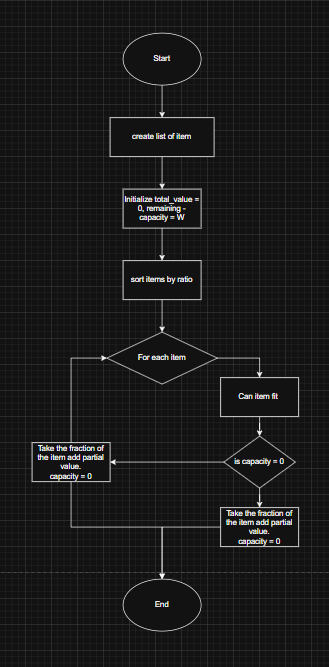

In [ ]:
def fractional_knapsack(values, weights, capacity):
    items = []
    for i in range(len(values)):
        ratio = values[i] / weights[i]
        items.append((ratio, values[i], weights[i]))

    items.sort(reverse=True)  # sort by ratio descending

    total_value = 0
    remaining = capacity

    for ratio, value, weight in items:
        if weight <= remaining:
            total_value += value
            remaining -= weight
        else:
            total_value += value * (remaining / weight)
            break

    return total_value

print(fractional_knapsack([60, 100, 120], [10, 20, 30], 50))


# Homework 4

• Try to improve the algorithm that solves the Bin Packing  <br>Problem. Can we do better?<br>
• Provide a flowchart, pseudocode and python code. <br>

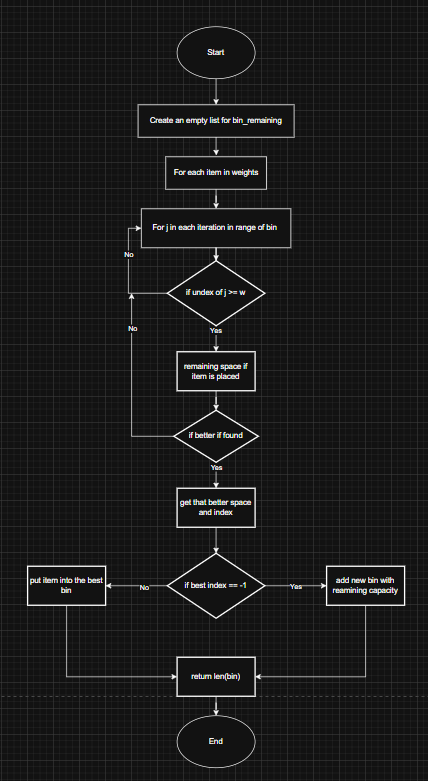

In [ ]:
def best_fit(weights, C):
    bin_rem = []  # remaining capacity in each bin

    for w in weights:
        best_index = -1
        best_space_after = None

        # try to find the bin that will be tightest after placing w
        for j in range(len(bin_rem)):     # iterate through existing bins
            if bin_rem[j] >= w:            # bin can accommodate item
                space_after = bin_rem[j] - w            # remaining space if item is placed
                if best_space_after is None or space_after < best_space_after:        # better fit found
                    best_space_after = space_after
                    best_index = j

        if best_index == -1:
            # open a new bin
            bin_rem.append(C - w)    # new bin with remaining capacity
        else:
            # put item into the best bin
            bin_rem[best_index] -= w

    return len(bin_rem)

print(best_fit([2,5,4,7,1,3,8], 10))


# Homework 5

• For homework 1 to 4, without using greedy algorithm, come up with an algorithm for each problem. <br>
• Show heuristic (approach), flow chart, pseudo code and actual code (with execution).<br>

1

Heuristic: <br>
In this non-greedy version, I used a dynamic programming approach instead of choosing the largest coin greedily. The idea is to calculate the minimum number of coins needed for every smaller amount up to the target value. For each amount, the algorithm checks all available coins and picks the one that leads to the fewest total coins, building up an optimal solution step by step. This ensures that we always get the minimum number of coins required, even in cases where the greedy approach fails.

In [ ]:
def coin_change_dp(amount, coins):
    INF = 10**9
    dp = [INF]*(amount+1); dp[0] = 0
    choice = [-1]*(amount+1)
    for x in range(1, amount+1):
        for c in coins:
            if c <= x and dp[x-c] + 1 < dp[x]:
                dp[x] = dp[x-c] + 1
                choice[x] = c
    counts = {c: 0 for c in coins}
    cur = amount
    while cur > 0 and choice[cur] != -1:
        c = choice[cur]
        counts[c] += 1
        cur -= c
    return dp[amount], counts

print(coin_change_dp(39, [1,2,5,10]))


2

Heuristic: <br>
Instead of just buying the cheapest stocks first, this version applies dynamic programming to explore all possible combinations of buying stocks across different days. Each day acts like a bounded item, where the stock can be bought up to a certain limit. The algorithm tries every valid spending combination to find the maximum total number of stocks that can be purchased within the budget. This approach guarantees the optimal result by considering all possibilities, not just the greedy cheapest-first path.

In [ ]:
def max_stocks_dp(prices, R):
    dp = [0]*(R+1)
    for day, cost in enumerate(prices):
        limit = day + 1
        newdp = dp[:]
        for money in range(R+1):
            for k in range(1, limit+1):
                spent = k*cost
                if spent <= money:
                    cand = dp[money-spent] + k
                    if cand > newdp[money]:
                        newdp[money] = cand
        dp = newdp
    return dp[R]

print(max_stocks_dp([10,7,19], 45))

3

Heuristic: <br>
For this version, the greedy algorithm is replaced with a 0/1 dynamic programming approach where each item can either be taken fully or left out. The DP table stores the maximum total value for every weight limit up to the knapsack’s capacity. For each item, the algorithm decides whether including it improves the total value compared to excluding it. This systematic approach ensures the best overall combination of items and always produces the optimal result, unlike the greedy method which may miss better subsets.

In [ ]:
def knapsack_dp(values, weights, W):
    n = len(values)
    dp = [[0]*(W+1) for _ in range(n+1)]
    for i in range(1, n+1):
        v, w = values[i-1], weights[i-1]
        for cap in range(W+1):
            dp[i][cap] = dp[i-1][cap]
            if w <= cap:
                cand = dp[i-1][cap-w] + v
                if cand > dp[i][cap]:
                    dp[i][cap] = cand
    return dp[n][W]

print(knapsack_dp([60,100,120], [10,20,30], 50))

4

Heuristic: <br>
The non-greedy version of the bin packing problem uses backtracking to find the true minimum number of bins needed. Instead of placing each item in the first or best-fitting bin like the greedy method, this approach explores every possible way of arranging items into bins. It tries to place each item in existing bins or opens a new one if needed, while pruning branches that already use too many bins. Although it’s slower, this exhaustive search guarantees the optimal packing solution and helps compare how accurate the greedy algorithm is.

BIN_PACKING_OPTIMAL(weights, C):
    best ← +∞
    function dfs(i, bin_rem):
        if i = len(weights): best ← min(best, len(bin_rem)); return
        if len(bin_rem) ≥ best: return
        w ← weights[i]
        for b in 0..len(bin_rem)-1:
            if bin_rem[b] ≥ w:
                bin_rem[b] ← bin_rem[b] - w
                dfs(i+1, bin_rem)
                bin_rem[b] ← bin_rem[b] + w
        append (C - w) to bin_rem
        dfs(i+1, bin_rem)
        pop bin_rem
    dfs(0, [])
    return best


In [ ]:
def bin_packing_optimal(weights, C):
    best = [len(weights)]
    def dfs(i, bins):
        if i == len(weights):
            if len(bins) < best[0]:
                best[0] = len(bins)
            return
        if len(bins) >= best[0]:
            return
        w = weights[i]
        for b in range(len(bins)):
            if bins[b] >= w:
                bins[b] -= w
                dfs(i+1, bins)
                bins[b] += w
        bins.append(C - w)
        dfs(i+1, bins)
        bins.pop()
    dfs(0, [])
    return best[0]

print(bin_packing_optimal([2,5,4,7,1,3,8], 10))